# 非监督学习——聚类
<img src='./image/6.14.png' width=500 />

## 聚类——K-means
基于切割
<img src='./image/6.14_1.png' width=500 />
<img src='./image/6.14_2.png' width=500 />
<img src='./image/6.14_3.png' width=300 div align=left />
<img src='./image/6.14_4.png' width=300 div align=left />
<img src='./image/6.14_5.png' width=300 div align=left />
<img src='./image/6.14_6.png' width=300 div align=left />

<img src='./image/6.14_7.png' width=500 />
<img src='./image/6.14_8.png' width=500 />

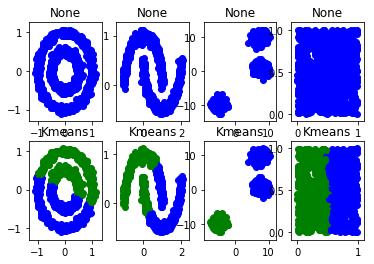

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons
from sklearn.cluster import KMeans

# 制造分析样本
n_samples=1000
circles=make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons=make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state=8)
random_data=np.random.rand(n_samples,2),None

colors='bgrcmyk'
data=[circles,moons,blobs,random_data]
models=[('None',None),('Kmeans',KMeans(n_clusters=2))]
f=plt.figure()
for inx,clt in enumerate(models):
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        X,Y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res=clt_entity.labels_.astype(np.int)
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)
        plt.title(clt_name)
        [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()

多跑几次，分类会有不同。这是因为初始质心不同。

## 聚类——DBSCAN
基于密度，只有当区域内密度达到一定水平才是一个类，否则就是离群点。
<img src='./image/6.16.png' width=500 />
<img src='./image/6.16_2.png' width=500 />
<img src='./image/6.16_3.png' width=500 />

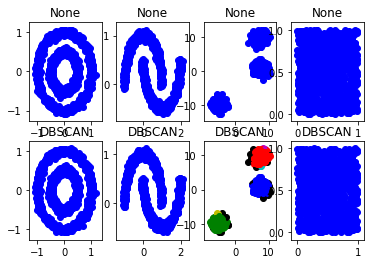

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons
from sklearn.cluster import KMeans,DBSCAN

# 制造分析样本
n_samples=1000
circles=make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons=make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state=8)
random_data=np.random.rand(n_samples,2),None

colors='bgrcmyk'
data=[circles,moons,blobs,random_data]
models=[('None',None)]
# # k-means
# models.append(('Kmeans',KMeans(n_clusters=2)))
# DBSCAN
models.append(('DBSCAN',DBSCAN(min_samples=3,eps=0.5)))
f=plt.figure()
for inx,clt in enumerate(models):
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        X,Y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res=clt_entity.labels_.astype(np.int)
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)
        plt.title(clt_name)
        [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()

第三个图与前两个的量级不同，0.5的领域无法将图1/2聚类，但是图三却分类过细。需要调一下样本量级，也调一下模型参数。

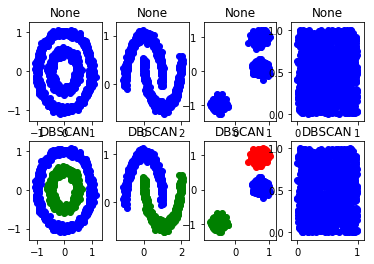

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons
from sklearn.cluster import KMeans,DBSCAN

# 制造分析样本
n_samples=1000
circles=make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons=make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state=8,center_box=(-1,1),cluster_std=0.1)
random_data=np.random.rand(n_samples,2),None

colors='bgrcmyk'
data=[circles,moons,blobs,random_data]
models=[('None',None)]
# # k-means
# models.append(('Kmeans',KMeans(n_clusters=2)))
# DBSCAN
models.append(('DBSCAN',DBSCAN(min_samples=3,eps=0.2)))
f=plt.figure()
for inx,clt in enumerate(models):
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        X,Y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res=clt_entity.labels_.astype(np.int)
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)
        plt.title(clt_name)
        [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()

## 聚类——层次聚类
首先所有样本属于不同类，共N类。要将N个点分为N-1类，就要把距离最近的两个点分为一类，其他还是各自自成一类；将这N-1个类分成N-2个类，就要把这N-1个里面最近的两个类合成一个类；……；每次都将最近的两个类合为一个类。最终将样本点分为k类。  

<img src='./image/6.17.png' width=400 div align=left />
<img src='./image/6.17_2.png' width=400 div align=left />
<img src='./image/6.17_3.png' width=400 div align=left />  

<img src='./image/6.17_4.png' width=500 />  
ESS平方残差和。如果两个簇合成一个之后，其ESS增加的量越小，就越可以合成一个簇。选择ESS增加最小的合成方式作为下一步的聚类方法。  
<img src='./image/6.17_5.png' width=500 />  

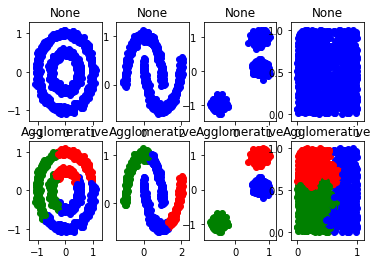

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering

# 制造分析样本
n_samples=1000
circles=make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons=make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state=8,center_box=(-1,1),cluster_std=0.1)
random_data=np.random.rand(n_samples,2),None

colors='bgrcmyk'
data=[circles,moons,blobs,random_data]
models=[('None',None)]
# # k-means
# models.append(('Kmeans',KMeans(n_clusters=2)))
# # DBSCAN
# models.append(('DBSCAN',DBSCAN(min_samples=3,eps=0.2)))
# 层次聚类 Agglomerative
models.append(('Agglomerative',AgglomerativeClustering(n_clusters=3,linkage='ward')))
f=plt.figure()
for inx,clt in enumerate(models):
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        X,Y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res=clt_entity.labels_.astype(np.int)
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)
        plt.title(clt_name)
        [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()

## 聚类——图分裂
<img src='./image/6.18.png' width=500 />  
t>$\lambda$，则切开。
<img src='./image/6.18_2.png' width=500 />  

## 关联——关联规则
<img src='./image/6.19.png' width=500 />  
<img src='./image/6.19_2.png' width=500 />  
<img src='./image/6.19_3.png' width=500 /> 
<img src='./image/6.19_4.png' width=500 />  
<img src='./image/6.19_5.png' width=500 />  
<img src='./image/6.19_6.png' width=500 />  
<img src='./image/6.19_7.png' width=500 />  

In [ ]:
from itertools import combinations
def comb(lst):
    ret=[]
    for i in range(1,len(lst)+1):
        ret+=list(combinations(lst,i))
    return ret
class AprLayer(object):
    d=dict()
    def __init__(self):
        self.d=dict()
class AprNode(object):
    def __init__(self,node):
        self.s=set(node)
        self.size=len(self.s)
        self.lnk_nodes=dict()
        self.num=0
    def __hash__(self):
        return hash("__".join(sorted([str(itm) for itm in list(self.s)])))
    def __eq__(self, other):
        if "__".join(sorted([str(itm) for itm in list(self.s)]))=="__".join(sorted([str(itm) for itm in list(other.s)])):
            return True
        return False
    def isSubnode(self,node):
        return self.s.issubset(node.s)
    def incNum(self,num=1):
        self.num+=num
    def addLnk(self,node):
        self.lnk_nodes[node]=node.s

class AprBlk():
    def __init__(self,data):
        cnt=0
        self.apr_layers = dict()
        self.data_num=len(data)
        for datum in data:
            cnt+=1
            datum=comb(datum)
            nodes=[AprNode(da) for da in datum]
            for node in nodes:
                if not node.size in self.apr_layers:
                    self.apr_layers[node.size]=AprLayer()
                if not node in self.apr_layers[node.size].d:
                    self.apr_layers[node.size].d[node]=node
                self.apr_layers[node.size].d[node].incNum()
            for node in nodes:
                if node.size==1:
                    continue
                for sn in node.s:
                    sub_n=AprNode(node.s-set([sn]))
                    self.apr_layers[node.size-1].d[sub_n].addLnk(node)

    def getFreqItems(self,thd=1,hd=1):
        freq_items=[]
        for layer in self.apr_layers:
            for node in self.apr_layers[layer].d:
                if self.apr_layers[layer].d[node].num<thd:
                    continue
                freq_items.append((self.apr_layers[layer].d[node].s,self.apr_layers[layer].d[node].num))
        freq_items.sort(key=lambda x:x[1],reverse = True)
        return freq_items[:hd]

    def getConf(self,low=True, h_thd=10, l_thd=1, hd=1):
        confidence = []
        for layer in self.apr_layers:
            for node in self.apr_layers[layer].d:
                if self.apr_layers[layer].d[node].num < h_thd:
                    continue
                for lnk_node in node.lnk_nodes:
                    if lnk_node.num < l_thd:
                        continue
                    conf = float(lnk_node.num) / float(node.num)
                    confidence.append([node.s, node.num, lnk_node.s, lnk_node.num, conf])

        confidence.sort(key=lambda x: x[4])
        if low:
            return confidence[:hd]
        else:
            return confidence[-hd::-1]

class AssctAnaClass():
    def fit(self,data):
        self.apr_blk=AprBlk(data)
        return self
    def get_freq(self,thd=1,hd=1):
        return self.apr_blk.getFreqItems(thd=thd,hd=hd)
    def get_conf_high(self,thd,h_thd=10):
        return self.apr_blk.getConf(low=False, h_thd=h_thd, l_thd=thd)
    def get_conf_low(self,thd,hd,l_thd=1):
        return self.apr_blk.getConf(h_thd=thd,l_thd=l_thd,hd=hd)


def main():
    data=[
        ["牛奶","啤酒","尿布"],
        ["牛奶","啤酒","咖啡","尿布"],
        ["香肠","牛奶","饼干"],
        ["尿布","果汁","啤酒"],
        ["钉子","啤酒"],
        ["尿布","毛巾","香肠"],
        ["啤酒","毛巾","尿布","饼干"]
    ]
    print("Freq",AssctAnaClass().fit(data).get_freq(thd=3,hd=10))
    print("Conf",AssctAnaClass().fit(data).get_conf_high(thd=3,h_thd=3))
if __name__=="__main__":
    main()